In [1]:
import os
import scipy
import collections
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
jsons = [e for e in sorted(os.listdir()) if all([e.startswith('MVPA'), e.endswith('json')])]
results_tables = dict()
for k in ['1', '2', 'macro avg', 'weighted avg']:
    for c in ['precision', 'recall', 'f1-score']:
        results_tables['{}-{}'.format(k, c)] = pd.DataFrame()
results_tables['accuracy'] = pd.DataFrame()

In [3]:
def time_report(y_pred, y_preds, y_true):
    f1 = np.zeros(y_preds.shape[0])
    recall = np.zeros(y_preds.shape[0])
    accuracy = np.zeros(y_preds.shape[0])
    allrep = sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true, output_dict=True)
    
    for j, y_pred in enumerate(y_preds):
        f1[j] = sklearn.metrics.f1_score(y_pred=y_pred, y_true=y_true, pos_label=1)
        recall[j] = sklearn.metrics.recall_score(y_pred=y_pred, y_true=y_true, pos_label=1)
        accuracy[j] = sklearn.metrics.accuracy_score(y_pred=y_pred, y_true=y_true)
    
    return dict(f1=f1,
                recall=recall,
                accuracy=accuracy,
                allrep=allrep)

In [4]:
results = collections.defaultdict(dict)

for fname in jsons:
    exper = fname[-12:-5]
    if exper.startswith('EEG'):
        continue
    print('-' * 80)
    print(exper)
    df = pd.read_json(fname)

    for freq in df.index:
        print(freq)
        y_true = df['y_true'][freq]
        y_pred = df['y_predict'][freq]
        y_pred_time = np.array(df['y_time_predict'][freq]).transpose()
        
        results[exper][freq] = time_report(y_pred, y_pred_time, y_true)
        
freqs = df.index
times = df['times']['Delta']
freqs, times

--------------------------------------------------------------------------------
MEG_S01
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------------------------------------------------------
MEG_S02
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------------------------------------------------------
MEG_S03
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------------------------------------------------------
MEG_S04
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------------------------------------------------------
MEG_S05
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------------------------------------------------------
MEG_S06
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------------------------------------------------------
MEG_S07
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------------------------------------------------------
MEG_S08
Delta
Theta
Alpha
Cb_U07
Cb_U30
--------------------------------

(Index(['Delta', 'Theta', 'Alpha', 'Cb_U07', 'Cb_U30'], dtype='object'),
 [-0.2,
  -0.19,
  -0.18,
  -0.17,
  -0.16,
  -0.15,
  -0.14,
  -0.13,
  -0.12,
  -0.11,
  -0.1,
  -0.09,
  -0.08,
  -0.07,
  -0.06,
  -0.05,
  -0.04,
  -0.03,
  -0.02,
  -0.01,
  0.0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.06,
  0.07,
  0.08,
  0.09,
  0.1,
  0.11,
  0.12,
  0.13,
  0.14,
  0.15,
  0.16,
  0.17,
  0.18,
  0.19,
  0.2,
  0.21,
  0.22,
  0.23,
  0.24,
  0.25,
  0.26,
  0.27,
  0.28,
  0.29,
  0.30000000000000004,
  0.31,
  0.32,
  0.33,
  0.34,
  0.35000000000000003,
  0.36,
  0.37,
  0.38,
  0.39,
  0.4,
  0.41000000000000003,
  0.42,
  0.43,
  0.44,
  0.45,
  0.46,
  0.47000000000000003,
  0.48,
  0.49,
  0.5,
  0.51,
  0.52,
  0.53,
  0.54,
  0.55,
  0.56,
  0.5700000000000001,
  0.58,
  0.59,
  0.6000000000000001,
  0.61,
  0.62,
  0.63,
  0.64,
  0.65,
  0.66,
  0.67,
  0.68,
  0.6900000000000001,
  0.7000000000000001,
  0.71,
  0.72,
  0.73,
  0.74,
  0.75,
  0.76,
  0.77,
  0.78,
  0.79

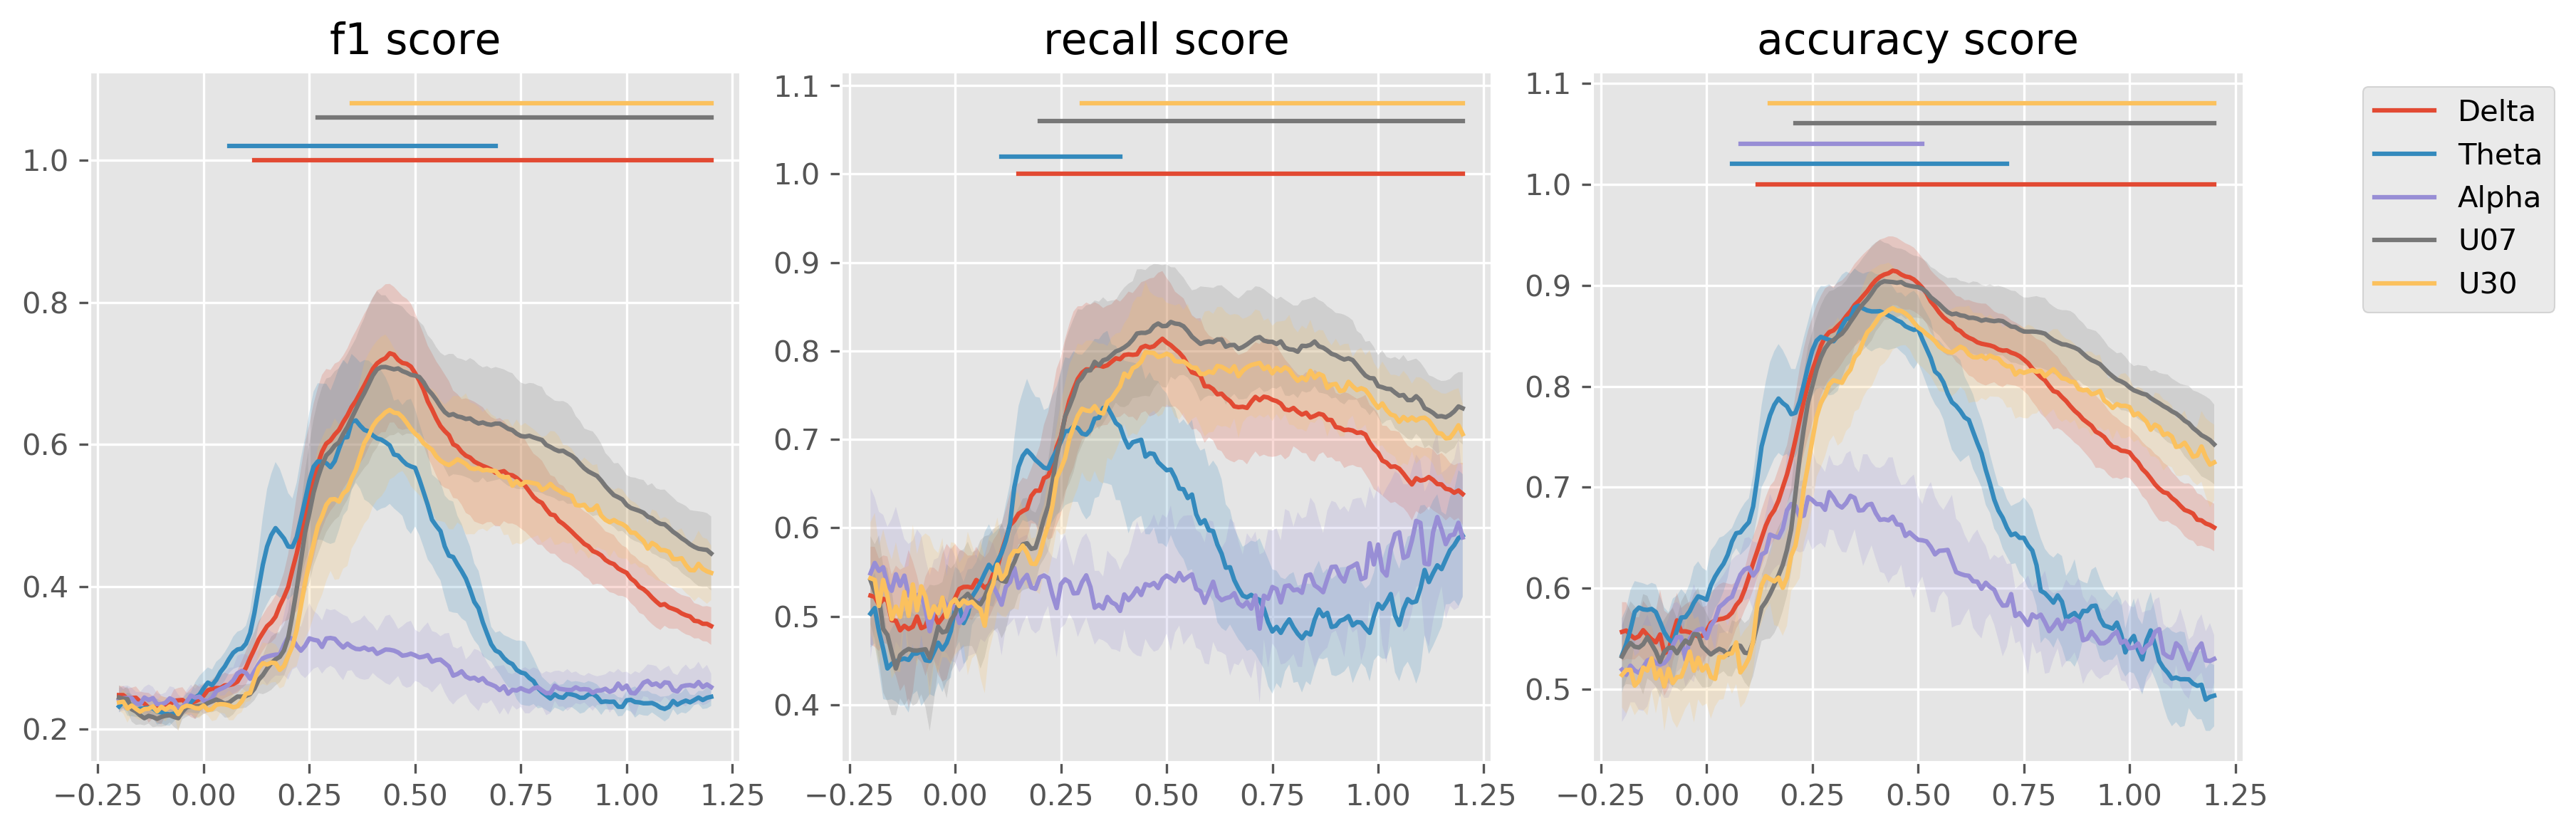

In [48]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=300)

sig_offsets = dict(Delta=0, Theta=0.02, Alpha=0.04, U07=0.06, U30=0.08)

for ax, score in zip(axes, ['f1', 'recall', 'accuracy']):
    for freq in freqs:
        mat = np.concatenate([np.expand_dims(e[freq][score], 0) for e in results.values()])
        mean_mat = np.mean(mat, 0)
        std_mat = np.std(mat, 0)
        line = ax.plot(times, mean_mat, line_styles.get(freq, '-'), label=freq.replace('Cb_', ''))
        ax.fill_between(times, mean_mat - std_mat, mean_mat + std_mat, alpha=0.2)
        
        m0 = np.mean(mean_mat[np.array(times)<0])
        sig_times = np.array(times)[mean_mat > (m0 + std_mat*3)]
        
        ax.plot(sig_times, sig_times*0 + 1 + sig_offsets[freq.replace('Cb_', '')], '-', color=line[0].get_color())
        
    ax.set_title('{} score'.format(score))

axes[-1].legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))

fig.tight_layout()

fig.savefig('Accs_time.png')

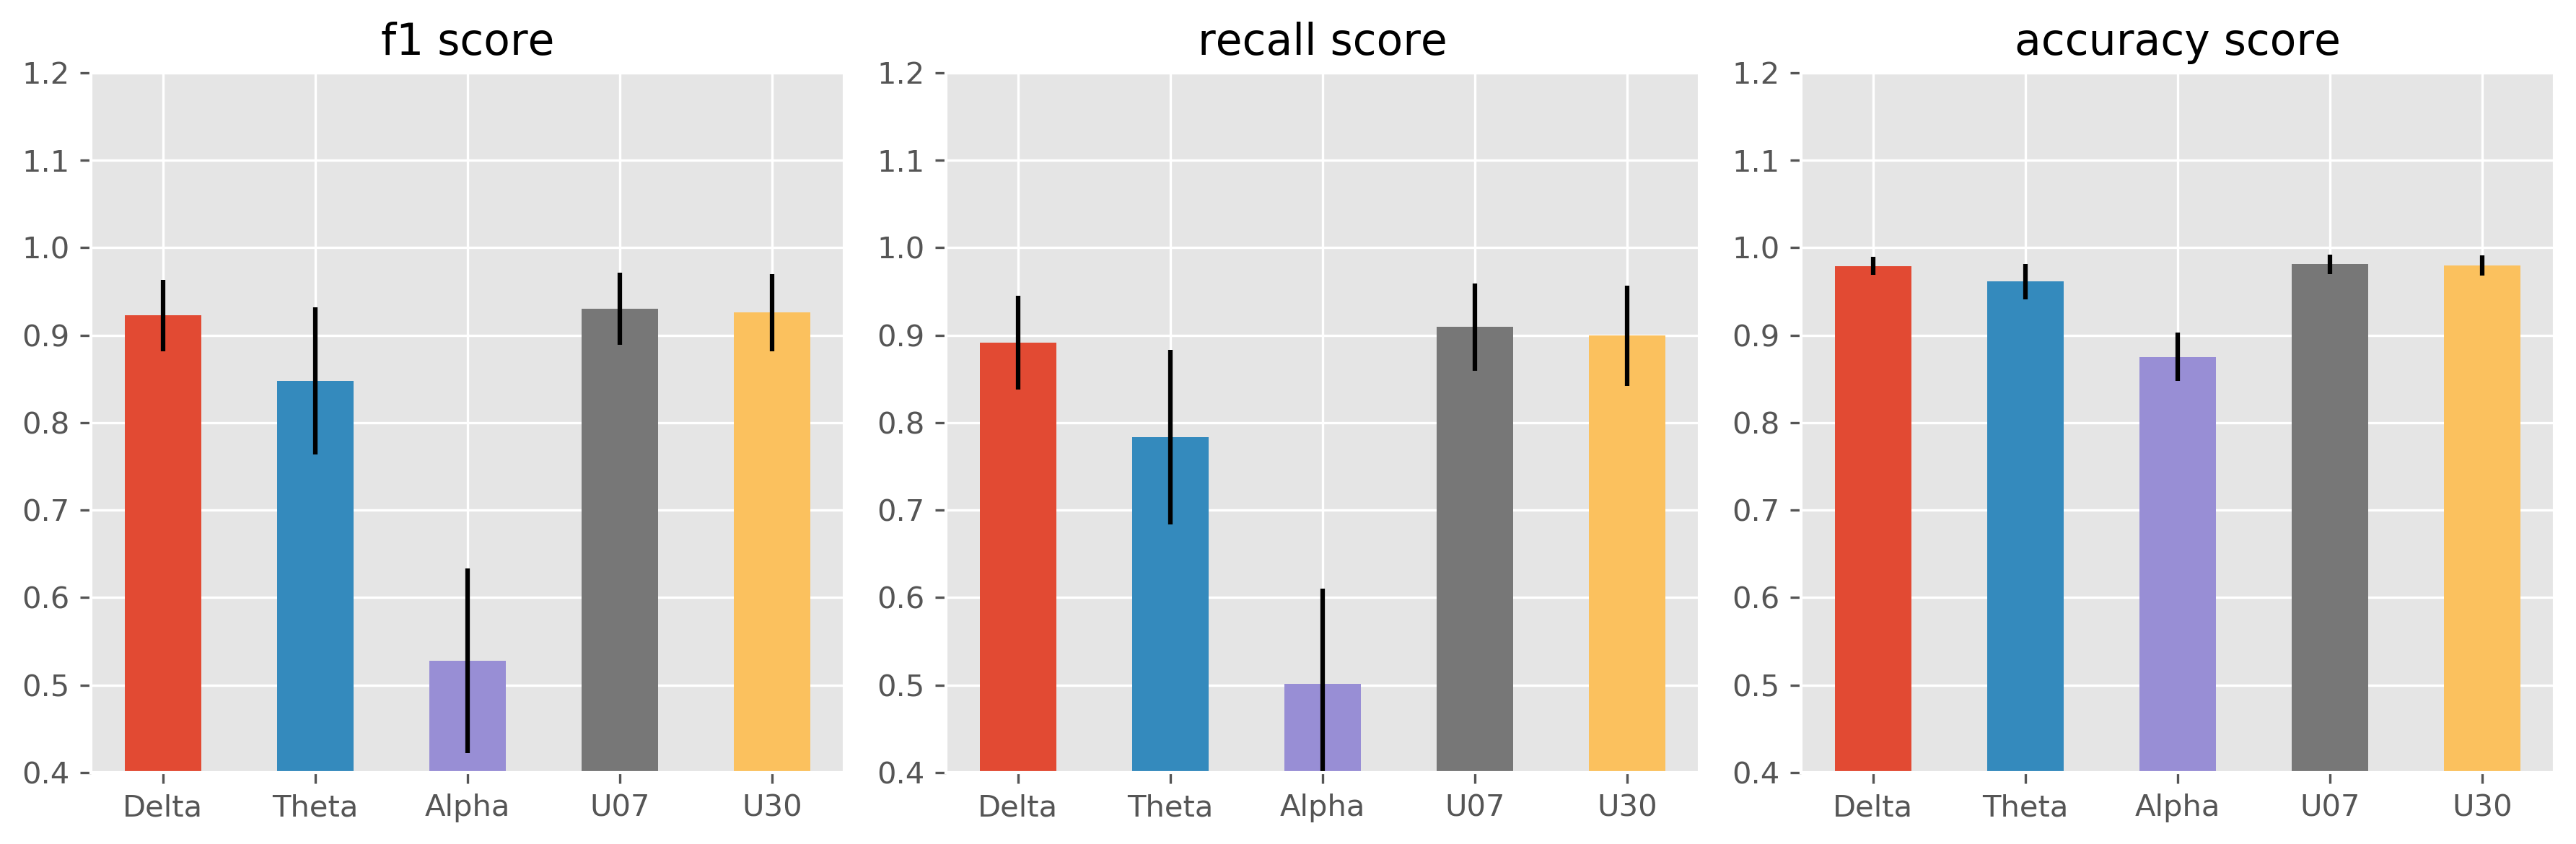

In [13]:
results['MEG_S02']['Delta']['allrep']

fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=300)

for freq in freqs:
    f1 = np.array([e[freq]['allrep']['1']['f1-score'] for e in results.values()])
    recall = np.array([e[freq]['allrep']['1']['recall'] for e in results.values()])
    accuracy = np.array([e[freq]['allrep']['accuracy'] for e in results.values()])
    
    for vec, ax, title in zip([f1, recall, accuracy],
                              axes,
                              ['f1 score', 'recall score', 'accuracy score']):
        m, s = np.mean(vec), np.std(vec)
        ax.bar(freq.replace('Cb_', ''), m, 0.5, yerr=s, label=freq.replace('Cb_', ''))
        ax.set_title(title)

for ax in axes:
    ax.set_ylim(0.4, 1.2)

fig.tight_layout()

fig.savefig('Accs_all.png')

In [7]:
f1s = dict()
recalls = dict()
accuracys = dict()
for freq in freqs:
    f1s[freq] = np.array([e[freq]['allrep']['1']['f1-score'] for e in results.values()])
    recalls[freq] = np.array([e[freq]['allrep']['1']['recall'] for e in results.values()])
    accuracys[freq] = np.array([e[freq]['allrep']['accuracy'] for e in results.values()])

In [21]:
f1df = pd.DataFrame(columns=freqs, index=freqs)
recalldf = pd.DataFrame(columns=freqs, index=freqs)
accuracydf = pd.DataFrame(columns=freqs, index=freqs)

for fa in freqs:
    for fb in freqs:
        if fa == fb: 
            continue
            
        s = scipy.stats.ttest_rel(f1s[fa], f1s[fb])
        f1df[fa][fb] = s.pvalue * np.sign(s.statistic)
        
        s = scipy.stats.ttest_rel(recalls[fa], recalls[fb])
        recalldf[fa][fb] = s.pvalue * np.sign(s.statistic)
        
        s = scipy.stats.ttest_rel(accuracys[fa], accuracys[fb])
        accuracydf[fa][fb] = s.pvalue * np.sign(s.statistic)

f1df[f1df > 0.05] = -1
recalldf[recalldf > 0.05] = -1
accuracydf[accuracydf > 0.05] = -1

f1df[f1df < 0] = '--'
recalldf[recalldf < 0] = '--'
accuracydf[accuracydf < 0] = '--'

In [22]:
f1df

,Delta,Theta,Alpha,Cb_U07,Cb_U30
Delta,NaN,--,--,0.00474941,--
Theta,0.00107756,NaN,--,0.000687521,0.000880397
Alpha,1.8046e-07,6.41498e-07,NaN,1.30049e-07,1.41835e-07
Cb_U07,--,--,--,NaN,--
Cb_U30,--,--,--,--,NaN


In [23]:
recalldf

,Delta,Theta,Alpha,Cb_U07,Cb_U30
Delta,NaN,--,--,1.37231e-05,--
Theta,0.000169946,NaN,--,8.73568e-05,0.000124308
Alpha,1.59868e-07,4.64573e-06,NaN,1.13637e-07,8.76295e-08
Cb_U07,--,--,--,NaN,--
Cb_U30,--,--,--,--,NaN


In [24]:
accuracydf

,Delta,Theta,Alpha,Cb_U07,Cb_U30
Delta,NaN,--,--,0.012754,--
Theta,0.000832073,NaN,--,0.000514981,0.000731266
Alpha,1.94892e-07,5.84054e-07,NaN,1.39864e-07,1.8583e-07
Cb_U07,--,--,--,NaN,--
Cb_U30,--,--,--,--,NaN
